## Introduccion a Grafos
**Universidad Tecnologica Nacional - Facultad Buenos Aires** <br>
**Ingenieria Industrial**<br>
**Investigacion Operativa** <br>
Autor: Martin Palazzo <br>
Curso I4051 <br>



#### Importamos librerias

In [1]:
# importamos las librerias clasicas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# importamos librerias especiales como networkx y euclidean_distances desde scikit-learn
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances


In [11]:
# instalamos una libreria especial para visualizar
#pip install decorator==4.3

#### Generamos ubicaciones ficticias de plantas industriales

In [12]:
# cada planta esta caracterizada por un vector de 2 dimensiones (lat y long)
planta_0 = np.array([[0,0]])
planta_1 = np.array([[1,1]])
planta_2 = np.array([[2,1]])
planta_3 = np.array([[3,1]])
planta_4 = np.array([[1,2]])
planta_5 = np.array([[1,3]])
planta_6 = np.array([[1,4]])
planta_7 = np.array([[2,3]])
planta_8 = np.array([[2,2]])

In [13]:
# concatenamos todas las ubicaciones de las plantas en un unico array
coordenadas_plantas = np.concatenate([planta_0, planta_1, planta_2,planta_3,
               planta_4,planta_5,planta_6,planta_7, planta_8], axis = 0)

In [125]:
coordenadas_plantas.shape

(9, 2)

#### Generamos una matriz de distancias par-a-par (matriz de adyacencia)
Utilizando la distancia euclidea entre plantas generamos una matriz de similaridad par-a-par

In [126]:
# utilizando la funcion euclidean_distances computamos la matriz de similaridad par-a-par
matriz_distancias = euclidean_distances(coordenadas_plantas, coordenadas_plantas)

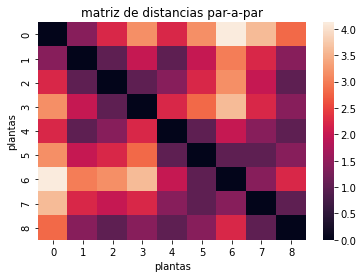

In [15]:
# visualizamos la matriz de adyacencia con heatmap
sns.heatmap(matriz_distancias)
plt.title('matriz de distancias par-a-par')
plt.xlabel('plantas')
plt.ylabel('plantas')
plt.show()

In [127]:
# revisamos el tipo de variable que es coordenadas_plantas
type(coordenadas_plantas)

numpy.ndarray

#### construccion del grafo con networkX
Con la matriz de adyacencia construimos un elemento de networkX llamado grafo

In [17]:
# definimos el grafo desde la matriz de adyacencia
G = nx.from_numpy_matrix(matriz_distancias)

In [18]:
# revisamos el tipo de elemento
type(G)

networkx.classes.graph.Graph

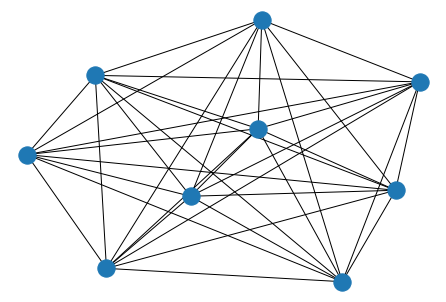

In [128]:
# visualizamos la red 
nx.draw(G)

## Grafo de estaciones de bicicletas

dataset 'bicicleteros.csv' obtenido desde https://data.buenosaires.gob.ar/dataset/bicicleteros-via-publica 

In [23]:
# importamos el archivo bicicleteros.csv con pandas y lo guardamos como un dataframe
bicicleteros = pd.read_csv('bicicleteros.csv')

In [129]:
type(bicicleteros)

pandas.core.frame.DataFrame

In [24]:
# usamos la funcion de pandas .head() para visualizar los primeros renglones del dataframe
bicicleteros.head()

,long,lat,id,nombre,anio_de_in,tipo,cantidad,ubicacion,clasificac,calle,altura,calle2,barrio,comuna,codigo_postal,codigo_postal_argentino
0,-58.456938,-34.626656,1,LINEA A CARABOBO,2011,4U,1,VIA PUBLICA,SUBTE,RIVADAVIA AV.,0,CARABOBO AV.,Flores,Comuna 7,NaN,NaN
1,-58.448757,-34.623699,2,LINEA A PUAN,2011,4U,1,VIA PUBLICA,SUBTE,RIVADAVIA AV.,0,PUAN,Caballito,Comuna 6,NaN,NaN
2,-58.441380,-34.620616,3,LINEA A PRIMERA JUNTA,2011,4U,1,VIA PUBLICA,SUBTE,RIVADAVIA AV.,0,ROJAS,Caballito,Comuna 6,NaN,NaN
3,-58.436347,-34.618144,4,LINEA A ACOYTE,2011,4U,1,VIA PUBLICA,SUBTE,RIVADAVIA AV.,0,ACOYTE AV.,Caballito,Comuna 6,NaN,NaN
4,-58.429896,-34.615279,5,LINEA A RIO DE JANEIRO,2011,4U,1,VIA PUBLICA,SUBTE,RIVADAVIA AV.,0,RIO DE JANEIRO,Caballito,Comuna 6,NaN,NaN


In [27]:
# revisamos que tipo de dato es la primer posicion de la columna long
type(bicicleteros.long[0])

numpy.float64

estandarizamos la columna long de manera que quede con minimo = 0 y maximo = 1
<br>
<br>
\begin{align}
\hat{x} = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)}
\end{align}

In [31]:
# estandarizamos la columna long de manera que quede con minimo = 0 y maximo = 1
long_norm = (bicicleteros.long - np.min(bicicleteros.long))/(np.max(bicicleteros.long)-np.min(bicicleteros.long))

In [38]:
# revisamos el type de long_norm
type(long_norm)

pandas.core.series.Series

In [32]:
# realizamos la misma estandarizacion en la columna lat
lat_norm = (bicicleteros.lat - np.min(bicicleteros.lat))/(np.max(bicicleteros.lat)-np.min(bicicleteros.lat))

In [39]:
type(lat_norm)

pandas.core.series.Series

C:\Users\martin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


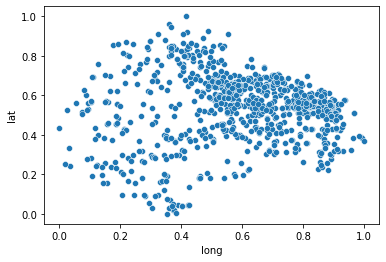

In [130]:
# visualizamos con scatterplot las estaciones donde la coordenada x = long , y = lat
sns.scatterplot(long_norm, lat_norm)
plt.show()

In [131]:
# concatenamos los vectores de long y lat en un solo dataframe
coordenadas_bicicleteros = pd.concat([long_norm, lat_norm], axis = 1)

In [46]:
coordenadas_bicicleteros.shape

(938, 2)

In [48]:
# visualizamos como quedo el dataframe resultante de concatenar lat y long
coordenadas_bicicleteros.head()

,long,lat
0,0.413332,0.402026
1,0.460129,0.420248
2,0.502327,0.439248
3,0.531118,0.454480
4,0.568019,0.472135


In [49]:
# con el dataframe coordenadas_bicicleteros generamos una matriz de similaridad par-a-par
matriz_dist_bici = euclidean_distances(coordenadas_bicicleteros, coordenadas_bicicleteros)

<AxesSubplot:>

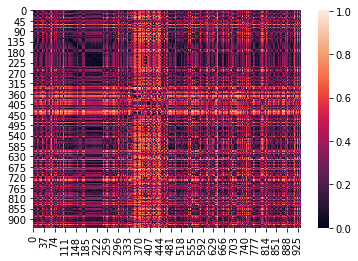

In [132]:
# visualizamos con heatmap la similaridad par-a-par usando distancia euclidea entre bicicleteros 
sns.heatmap(matriz_dist_bici)

In [116]:
# como el grafo anterior tiene mucha densidad de arcos decidimos usar un filtro y llevamos a 0 todo arco cuya dist < 0.4
matriz_dist_bici_filt = np.where(matriz_dist_bici < 0.4, 0, matriz_dist_bici)

<AxesSubplot:>

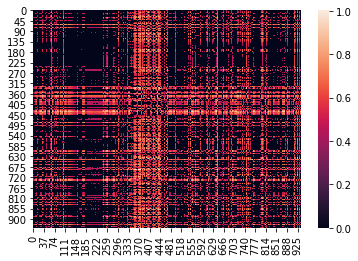

In [117]:
# visualizamos la nueva matriz filtrada por arcos
sns.heatmap(matriz_dist_bici_filt)

In [119]:
matriz_dist_bici_filt

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.41478988],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41478988, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### visualizacion con networkX

In [123]:
G_bici = nx.from_numpy_matrix(matriz_dist_bici_filt)
pos_ = nx.spring_layout(G_bici, iterations=100)

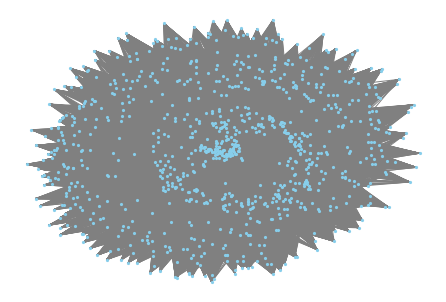

In [124]:
nx.draw(G_bici, node_size=10, node_color = 'skyblue', node_shape = 'o', linewidths = 0.01, edge_color="grey",
       style="solid", pos = pos_)
